In [1]:
import pandas as pd  


url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Display first 5 rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

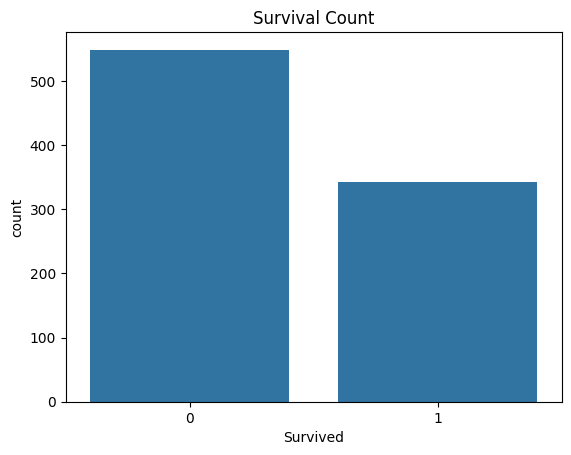

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()


In [4]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [9]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [12]:
print(df.columns)


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')


In [14]:
print(df.columns)


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')


In [15]:
df.drop(columns=['Cabin', 'Embarked'], inplace=True)


In [17]:
df['Age'] = df['Age'].fillna(df['Age'].median())


In [19]:
print(df.columns)


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [20]:
df.describe()


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


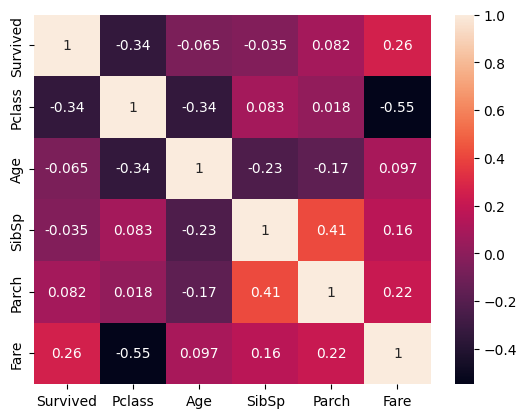

In [22]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot the correlation heatmap
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()


In [24]:
print(df.columns)



Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


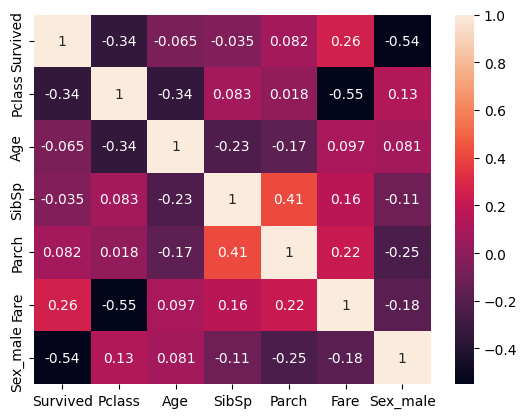

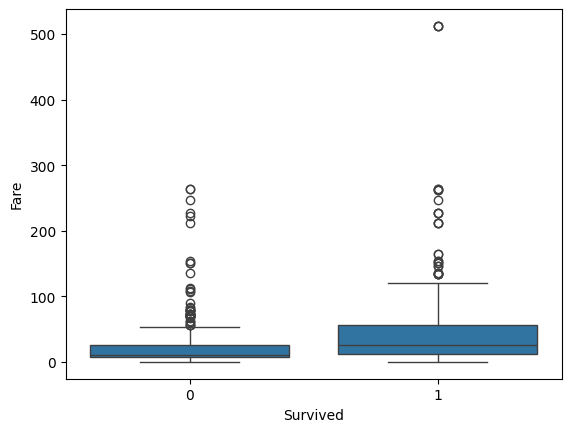

In [25]:
# Encode 'Sex' column
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

# Check correlations
sns.heatmap(df.corr(), annot=True)
plt.show()

# Visualize the relationship between 'Fare' and 'Survived'
sns.boxplot(x='Survived', y='Fare', data=df)
plt.show()


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into features (X) and target (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally: Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Check the shapes of the training and testing sets
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (712, 6)
Testing data shape: (179, 6)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.7989
Confusion Matrix:
[[90 15]
 [21 53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [28]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f"Accuracy (Random Forest): {accuracy_rf:.4f}")
print("Confusion Matrix (Random Forest):")
print(conf_matrix_rf)
print("Classification Report (Random Forest):")
print(class_report_rf)


Accuracy (Random Forest): 0.8045
Confusion Matrix (Random Forest):
[[90 15]
 [20 54]]
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [29]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Support Vector Machine (SVM) classifier
svm_model = SVC()

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

# Output results
print(f"Accuracy (SVM): {accuracy_svm}")
print("Confusion Matrix (SVM):")
print(conf_matrix_svm)
print("Classification Report (SVM):")
print(class_report_svm)


Accuracy (SVM): 0.8100558659217877
Confusion Matrix (SVM):
[[92 13]
 [21 53]]
Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize KNN with chosen hyperparameters
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

# Print results
print(f"Accuracy (KNN): {accuracy_knn}")
print("Confusion Matrix (KNN):")
print(conf_matrix_knn)
print("Classification Report (KNN):")
print(class_report_knn)


Accuracy (KNN): 0.7877094972067039
Confusion Matrix (KNN):
[[87 18]
 [20 54]]
Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")


Best Parameters: {'n_neighbors': 3, 'weights': 'uniform'}
Best Cross-Validation Score: 0.8244065793361568


In [32]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(knn, X, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")


Cross-Validation Scores: [0.63128492 0.68539326 0.70786517 0.73033708 0.71348315]
Mean CV Score: 0.6936727135773022


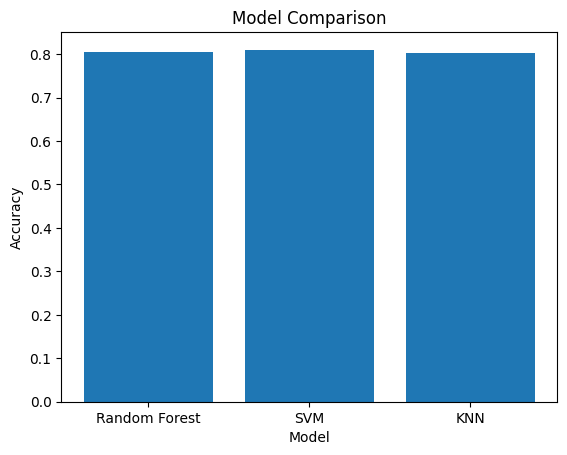

In [33]:
# Example output for model comparison
models = ['Random Forest', 'SVM', 'KNN']
accuracies = [0.8045, 0.8101, 0.803]

plt.bar(models, accuracies)
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()


In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")


Best Parameters: {'n_neighbors': 3, 'weights': 'uniform'}
Best Score: 0.8244065793361568


In [35]:
best_model = grid_search.best_estimator_  # or your best model (e.g., rf, knn, etc.)
y_pred = best_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")


Accuracy: 0.7877094972067039
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       105
           1       0.74      0.74      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

Confusion Matrix: 
[[86 19]
 [19 55]]


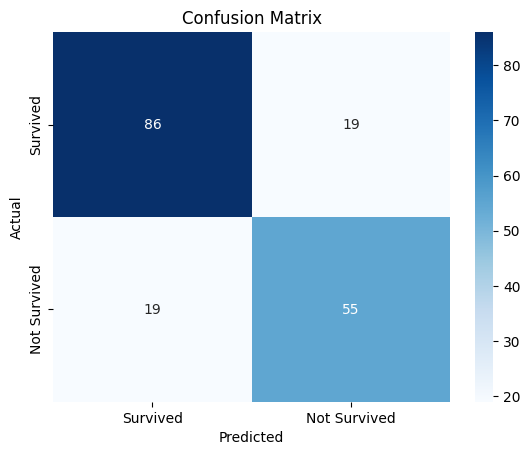

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Survived', 'Not Survived'], yticklabels=['Survived', 'Not Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


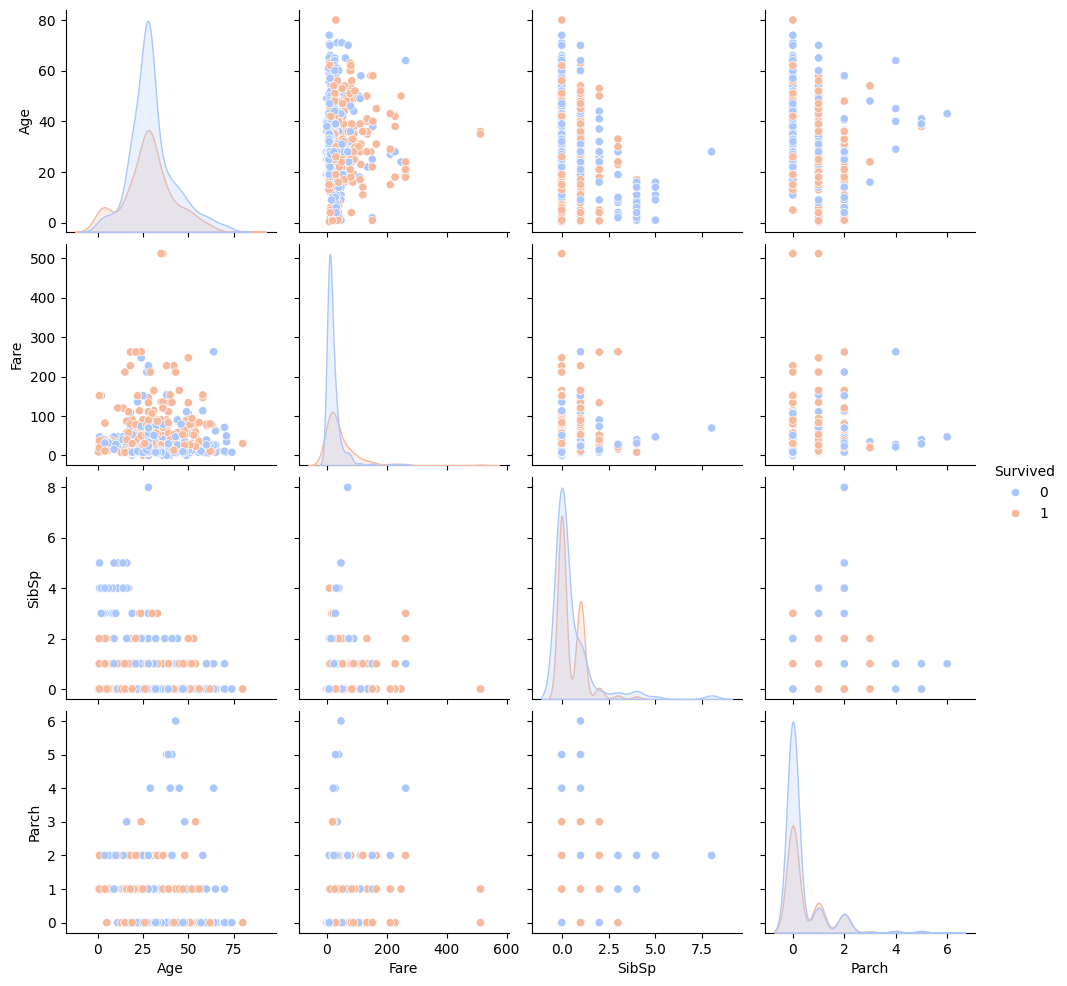

In [37]:
import seaborn as sns
sns.pairplot(df, hue='Survived', vars=['Age', 'Fare', 'SibSp', 'Parch'], palette='coolwarm')
plt.show()


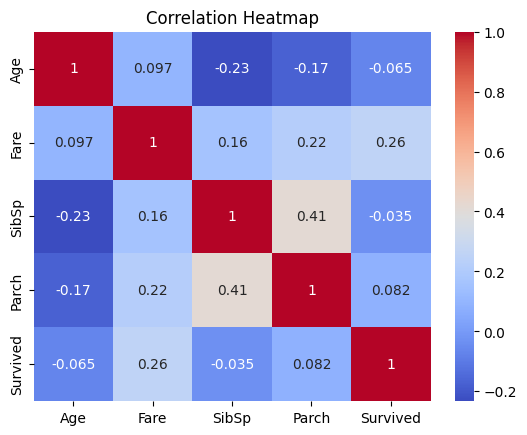

In [38]:
# If you've handled categorical data
corr_matrix = df[['Age', 'Fare', 'SibSp', 'Parch', 'Survived']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


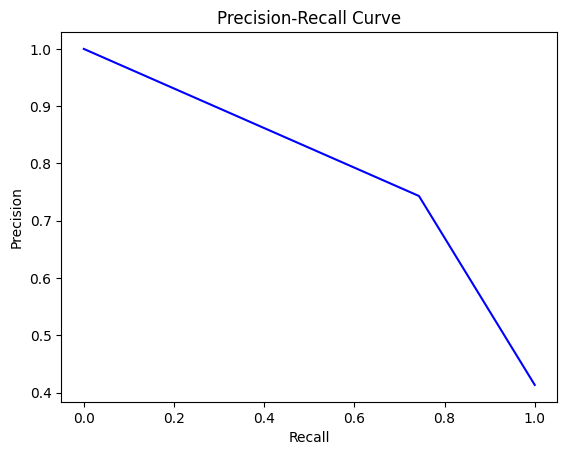

In [39]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


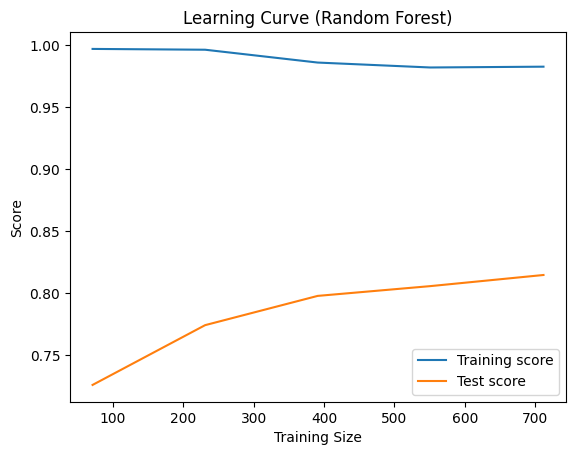

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Assuming you already have your training data 'X' and 'y' prepared
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(rf, X, y, cv=5)

# Plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Test score')
plt.title('Learning Curve (Random Forest)')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.show()


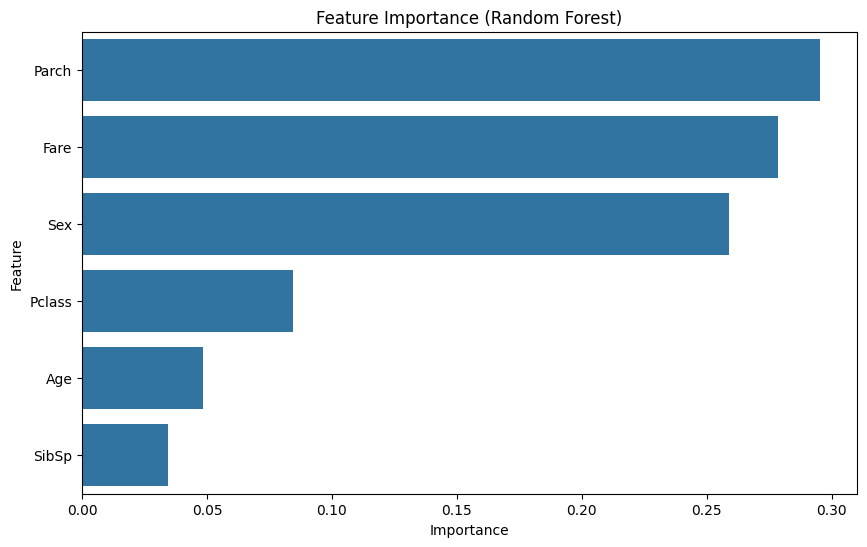

In [43]:
# Convert X_train (which is a NumPy array) to a DataFrame
X_train_df = pd.DataFrame(X_train, columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'])  # Add your feature names

# Now you can proceed with feature importance
feature_importance = rf.feature_importances_

# Create a DataFrame to hold feature names and their importance
feature_names = X_train_df.columns
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Feature Importance (Random Forest)')
plt.show()


     Actual  Predicted
709       1          0
439       0          0
840       0          0
720       1          1
39        1          0
Accuracy: 0.8101
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Confusion Matrix:
[[90 15]
 [19 55]]


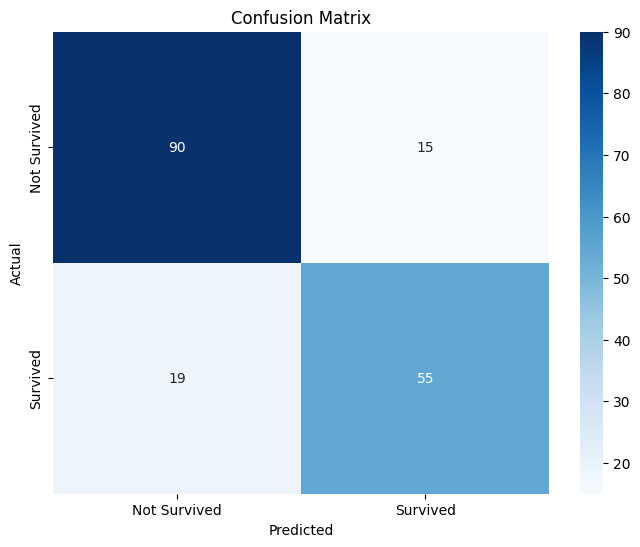

In [44]:
# Predicting on the test set
y_pred = rf.predict(X_test)

# Displaying the actual and predicted values
output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(output.head())

# Calculating accuracy, precision, recall, F1 score, etc.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification Report (precision, recall, f1-score)
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Visualize Confusion Matrix using Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
